# E-commerce Dataset
This dataset contains information on customers who purchase clothes online after receiving personalized styling advice. The customers participate in virtual styling sessions conducted through video calls or chat-based consultations. During these sessions, a professional stylist provides tailored fashion recommendations based on the customer's preferences, body type, and style goals. After the session, customers can browse and order suggested clothing items through the store’s mobile app or website at their convenience. 

The dataset captures details such as customer email, address, avatar, average session length, time spent on the app, time spent on the website, length of membership, and yearly amount spent, providing insights into customer demographics, session engagement, and purchasing behavior.

## Problem Statement
### "Should the company focus on improving its mobile app or website experience to maximize customer spending?"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set_theme(style="darkgrid")

In [2]:
df= pd.read_csv(r'Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


From this table we can get the summary of the customers behaviours and spending patterns.
On an average hte users spend about 33 minutes per session with bit of variration. They spend more time on the website (i.e. 37 minutes) than on the app (i.e. 12 minutes). The length of membership varies form few months to nearly 7 years. When it comes to spending, customers spend an average of 499 dollars per year.However, it ranges from as low as 257 dollars to as high as 766 dollars which indicates that the spending habit is quite consistent overall.

# Exploratory Data Analysis (EDA)

<Figure size 1000x600 with 0 Axes>

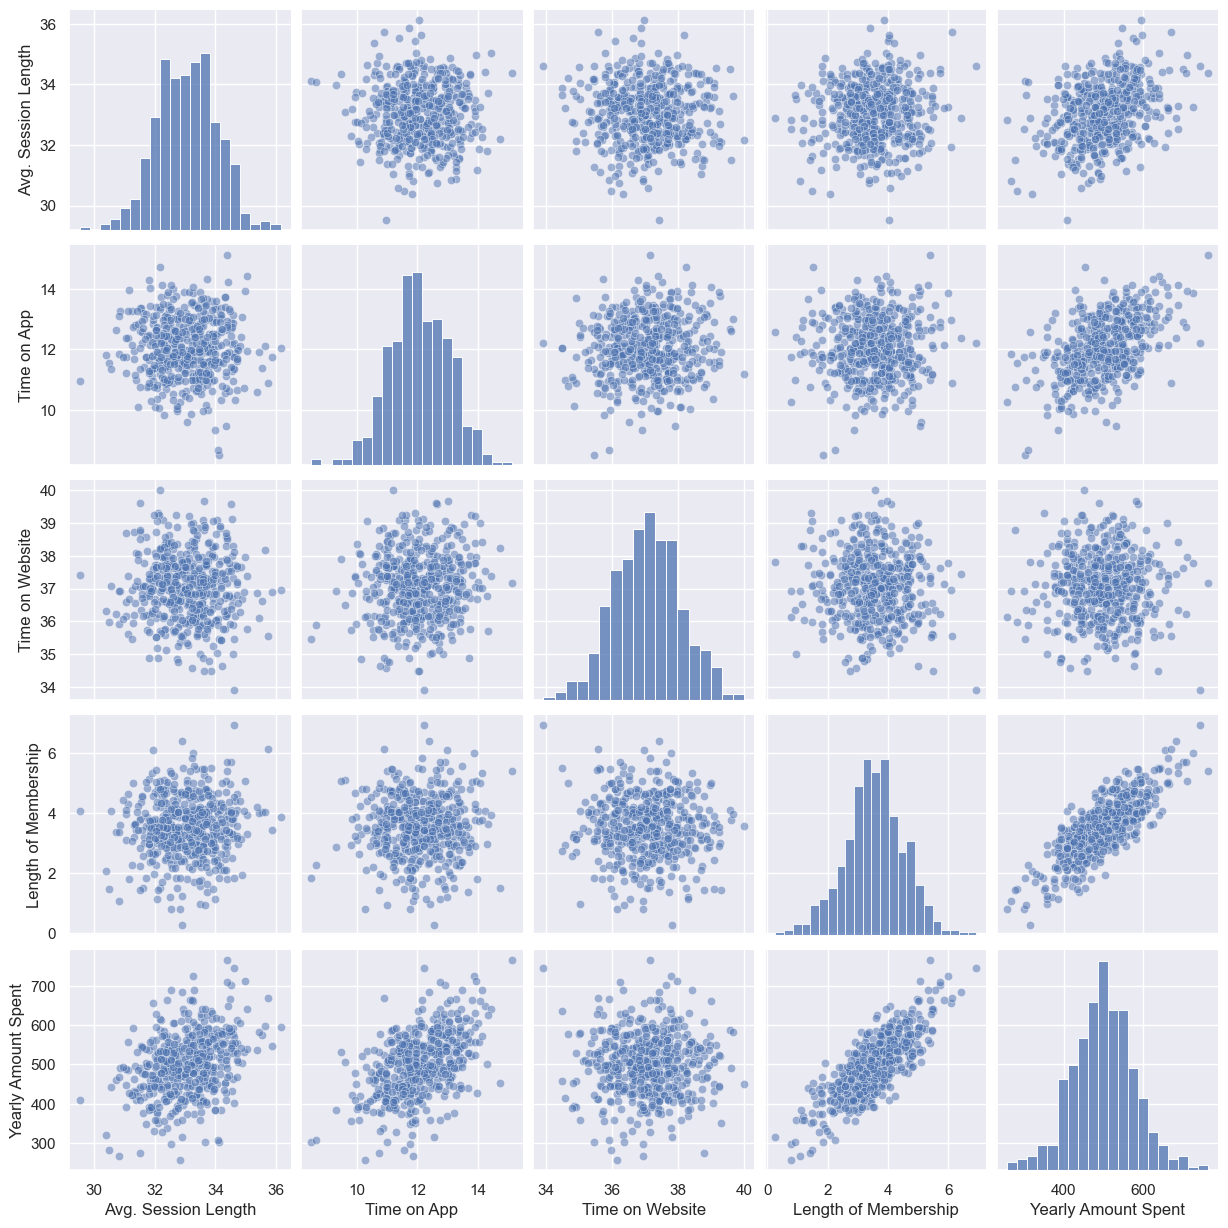

In [6]:
plt.figure(figsize = (10,6))
sns.pairplot(data= df , kind= 'scatter' ,plot_kws = {'alpha':0.5})
plt.show()

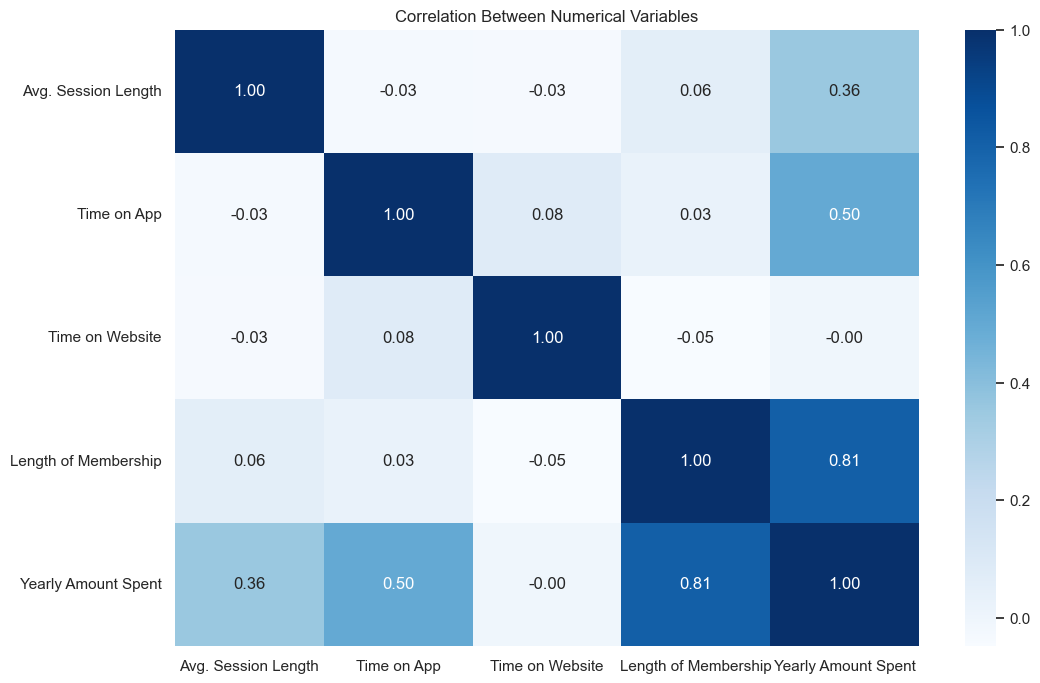

In [7]:
df1 = df[['Avg. Session Length','Time on App',	'Time on Website',	'Length of Membership',	'Yearly Amount Spent']]
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot = True,fmt= '.2f',cmap= 'Blues', )
plt.title('Correlation Between Numerical Variables')
plt.show()

A heatmap is used to get the correlation between variables where the intensity of the color indicates the strength of the correlation. We can observe that darker the color gets higher the correlation between variables. 

A perfect correlation is observed when a variable correlates with itself.

This heatmap reveals that yearly amount spent has correlation with several variables: length of membership, time on app and avg session length, this indicates that all these variables may have a significant role in influencing the yearly amount spent.

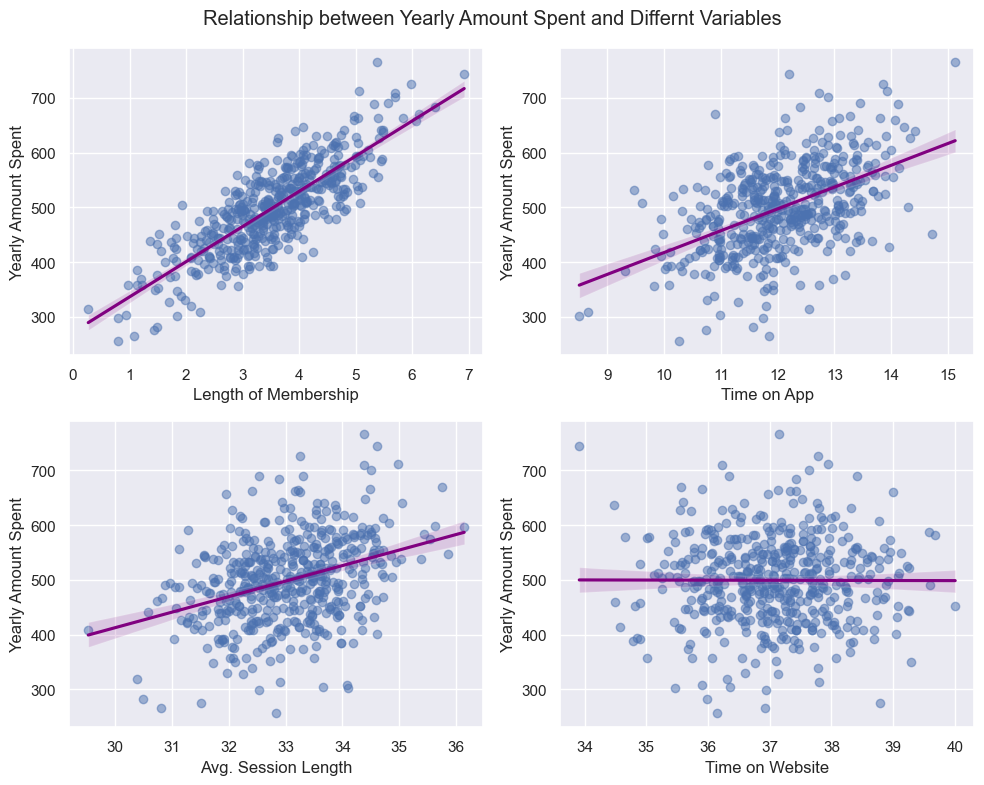

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('Relationship between Yearly Amount Spent and Differnt Variables')
# Plot each regression
sns.regplot(x='Length of Membership', y='Yearly Amount Spent', data=df, scatter_kws={'alpha':0.5},line_kws={"color": "purple"}, ax=axes[0, 0])
sns.regplot(x='Time on App', y='Yearly Amount Spent', data=df,scatter_kws={'alpha':0.5},line_kws={"color": "purple"},  ax=axes[0, 1])
sns.regplot(x='Avg. Session Length', y='Yearly Amount Spent', data=df,scatter_kws={'alpha':0.5},line_kws={"color": "purple"},  ax=axes[1, 0])
sns.regplot(x='Time on Website', y='Yearly Amount Spent', data=df,scatter_kws={'alpha':0.5}, line_kws={"color": "purple"}, ax=axes[1, 1])


plt.tight_layout()
plt.show()

We can observe the scatter plots with regression lines which shows the relationship between different variables and Yearly Amount Spent.

+Top-left (Length of Membership vs. Yearly Amount Spent):
 There is a strong positive correlation between the length of membership and the yearly amount spent. This suggests that customers who have been members for a longer time tend to spend more annually.

+Top-right (Time on App vs. Yearly Amount Spent):
 A moderate positive correlation is observed. More time spent on the app is associated with higher yearly spending, but the relationship is not as strong as with membership length.

+Bottom-left (Avg. Session Length vs. Yearly Amount Spent):
 There is a weak to moderate positive correlation. Longer session durations are slightly linked to higher spending.

+Bottom-right (Time on Website vs. Yearly Amount Spent):
 Almost no correlation is present. Time spent on the website does not seem to significantly influence the yearly amount spent.

# Predictive Analysis: Applying Linear Regression

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]	
y = df['Yearly Amount Spent']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42)

In [12]:
X_train.shape, X_test.shape

((350, 4), (150, 4))

In [13]:
# preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transform = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)

In [14]:
# Algorithm 

from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train_transform, y_train)

LinearRegression()

In [15]:
model.coef_

array([25.46811442, 38.74324339,  0.46854792, 63.35347072])

In [16]:
coef_table = pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])
coef_table

,coefficient
Avg. Session Length,25.468114
Time on App,38.743243
Time on Website,0.468548
Length of Membership,63.353471


The estimates reveal that the Length of Membership has the greatest impact of spending, which is at 63.35. This shows that customers who have been with the company for a long time, spend a lot more in total. Time on App (38.74) also has a major impact, which indicates more time spent on the app will increase yearly spending, whereas Time on Website (0.47) will have little to no impact. Avg. Session Length (25.47) still impacts spending in a positive manner, however it is not as strong of a factor as membership length.

In [17]:
y_pred = model.predict(X_test_transform)

In [18]:
vs = pd.DataFrame(y_pred, y_test , columns=['Predictions'])
vs.sample(10)

,Predictions
Yearly Amount Spent,
421.326631,422.369513
485.923131,501.045942
392.497399,388.550383
407.704548,411.842386
503.387887,509.888652
447.369027,431.456840
545.945492,563.985134
519.372977,518.614313
605.061039,596.130496


# Model Evaluation 

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:
print(f'The Mean Absolute Error = {mae}')
print(f'The Mean Squared Error = {mse}')
print(f'The R2 score = {r2}')

The Mean Absolute Error = 8.426091641432098
The Mean Squared Error = 103.91554136503315
The R2 score = 0.9808757641125856


+ The MAE of 8.43 and MSE of 103.92 indicates that the errors present in the model are not  that big enough which questions the accuracy of the model. It does predict yearly spending well, but more adjustments could be made to improve the accuracy.
The high R² scores,suggest that the model is robust and capable of making accurate predictions on unseen data, making it a strong and reliable model for predicting yearly spending.

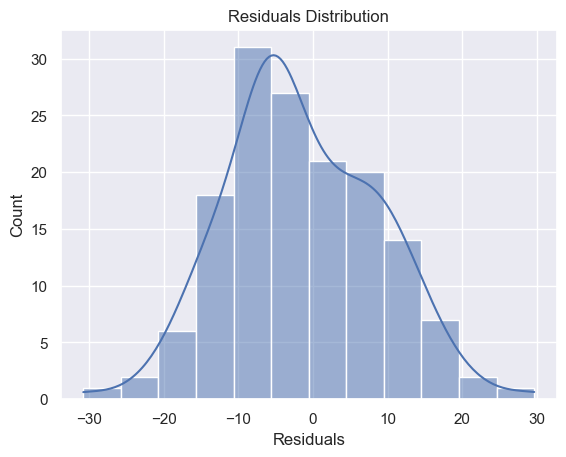

In [22]:
# check for residual

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

+ The residual should have a normal distribution and with a mean of 0 and no skewness. We can observe that the residual looks roughly normally distributed with only a slight bit of rightward skewed. This suggests that the model is doing a good job in capaturing the overall patterns in the data but there is still small level of bias in the predictions. The slight rightward skew indicates that some predictions are consistently lower than actual values.

# Conclusion 

+ Length of Membership has the strongest impact on spending ($63.35 increase per unit), suggesting that retaining customers longer leads to higher spending.
  
+ Time on App is the second most influential factor ($38.74 increase per unit), reinforcing that customers engaging with the app spend more.

  
+ Avg. Session Length also contributes ($25.47 increase per unit), meaning longer interactions (whether on the app or website) encourage spending.

  
+ Time on Website has a negligible effect ($0.47 increase per unit), meaning improving the website likely won’t significantly boost spending.


# Final Recommendation
The company must focus on the mobile app and customer retention. The company should enhance the app experience and implement strategies to increase membership duration, such as loyalty programs or personalized offers. In this way they  will be able to maximize the customer spending.

# How Predictions Can Help the Company?

### Forecasting Customer Spending:

In [47]:
new_data = pd.read_csv(r'predict_data.csv')

In [48]:
new_data

,ID,Email,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1,alex.johnson92@email.com,"742 Evergreen Terrace, Springfield, IL 62704",32.845392,12.398273,36.528394,3.289304
1,2,sophia.miller23@email.net,"221B Baker Street, London, UK NW1 6XE",34.124785,11.892376,37.183920,2.948301
2,3,ethan.brown56@email.org,"1600 Pennsylvania Ave NW, Washington, DC 20500",31.659827,10.573291,35.829103,4.104562
3,4,olivia.taylor78@email.com,"10 Downing Street, Westminster, London SW1A 2A...",33.489301,13.028493,36.973482,3.512894
4,5,liam.anderson34@email.io,"350 Fifth Avenue, New York, NY 10118",32.784509,11.203894,37.462839,3.809214
5,6,emma.thomas99@email.net,"1 Infinite Loop, Cupertino, CA 95014",33.125890,12.892374,35.938471,2.671982
6,7,mason.wilson12@email.org,"123 Elm Street, Dallas, TX 75201",34.673920,10.748291,38.102384,4.235671
7,8,ava.moore67@email.com,"456 Oak Avenue, San Francisco, CA 94102",32.947382,13.589203,36.284910,3.394820
8,9,noah.harris45@email.io,"789 Maple Drive, Chicago, IL 60611",31.982347,11.947382,37.829104,2.938201
9,10,mia.clark88@email.net,"987 Pine Road, Miami, FL 33139",33.492837,12.302984,36.103829,3.748291


In [49]:
data = new_data.drop(columns=['ID','Email','Address'])

In [50]:
new_data_transform = scaler.transform(data)

In [51]:
new_prediction = model.predict(new_data_transform)

In [52]:
new_data['Predictions'] = new_prediction

In [53]:
new_data

,ID,Email,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership,Predictions
0,1,alex.johnson92@email.com,"742 Evergreen Terrace, Springfield, IL 62704",32.845392,12.398273,36.528394,3.289304,485.572239
1,2,sophia.miller23@email.net,"221B Baker Street, London, UK NW1 6XE",34.124785,11.892376,37.183920,2.948301,459.181046
2,3,ethan.brown56@email.org,"1600 Pennsylvania Ave NW, Washington, DC 20500",31.659827,10.573291,35.829103,4.104562,479.879484
3,4,olivia.taylor78@email.com,"10 Downing Street, Westminster, London SW1A 2A...",33.489301,13.028493,36.973482,3.512894,559.775748
4,5,liam.anderson34@email.io,"350 Fifth Avenue, New York, NY 10118",32.784509,11.203894,37.462839,3.809214,502.188517
5,6,emma.thomas99@email.net,"1 Infinite Loop, Cupertino, CA 95014",33.125890,12.892374,35.938471,2.671982,434.286306
6,7,mason.wilson12@email.org,"123 Elm Street, Dallas, TX 75201",34.673920,10.748291,38.102384,4.235671,594.965565
7,8,ava.moore67@email.com,"456 Oak Avenue, San Francisco, CA 94102",32.947382,13.589203,36.284910,3.394820,551.116898
8,9,noah.harris45@email.io,"789 Maple Drive, Chicago, IL 60611",31.982347,11.947382,37.829104,2.938201,396.864800
9,10,mia.clark88@email.net,"987 Pine Road, Miami, FL 33139",33.492837,12.302984,36.103829,3.748291,559.823865


The model can predict how much a customer is likely to spend based on their time spent on the app, website, session length, and membership duration.
This allows the company to identify high-value customers and target them with personalized offers.